In [22]:
# import packages
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ionq import IonQProvider
import matplotlib.pyplot as plt

from sprite import Sprite

provider = IonQProvider(token='vm05jEWtO7zVGE6laZPtx8jbLM66TaS9')
backend = provider.get_backend("ionq_simulator")
# backend = provider.get_backend("ionq_qpu")


In [23]:
config = backend.configuration()

print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ionq_qpu, and is on version 0.0.1. It has 32 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['ccx', 'ch', 'cnot', 'cp', 'crx', 'cry', 'crz', 'csx', 'cx', 'cy', 'cz', 'h', 'i', 'id', 'mcp', 'mcphase', 'mct', 'mcx', 'mcx_gray', 'measure', 'p', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'toffoli', 'x', 'y', 'z'].


In [7]:
class QuantumPersonalityState:

    NUM_QUBITS = 9

    def __init__(self, personality_traits):
        self.personality_traits = [round(x) for x in personality_traits]
        self.qc = QuantumCircuit(self.NUM_QUBITS, self.NUM_QUBITS)
        self.qc.h(range(3))
        self.apply_personality_gates()

    def apply_personality_gates(self, start_index=0):
        
        for i in range(len(self.personality_traits)):
            if self.personality_traits[i] == 1:
                self.qc.x(i+start_index)

        # correlate
        for i in range(len(self.personality_traits)):
            if self.personality_traits[i] == 1:
                self.qc.toffoli(0, 1, i+3+start_index)
            else:
                self.qc.cnot(2, i+3+start_index)

    def draw(self):
        print(self.qc.draw())

    def get_pfp_reprn(self):
        self.qc.measure(range(self.NUM_QUBITS), range(self.NUM_QUBITS))
        job = backend.run(self.qc, shots=1)
        result = job.result()
        counts = result.get_counts(self.qc)
        # print(result.get_probabilities())
        # get the most common result
        state = max(counts, key=counts.get)
        return list(map(int, reversed(state)))




In [17]:
test_personality_traits = [1, 1, 1, 0, 1, 0]

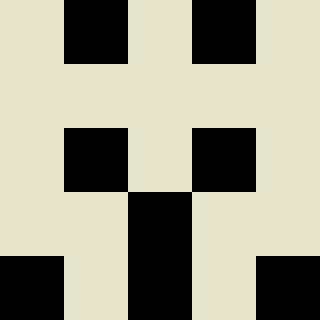

In [21]:
test_personality_state = QuantumPersonalityState(test_personality_traits)
# test_personality_state.draw()
pfp_repn = test_personality_state.get_pfp_reprn()
pfp_sprite = Sprite(pfp_repn)
pfp_sprite.render()

In [4]:
job = backend.run(bell_qc, shots=1024)
result = job.result()
counts = result.get_counts(bell_qc)
plot_histogram(counts)


MissingOptionalLibraryError: "The 'matplotlib' library is required to use '_plotting_core'. You can install it with 'pip install matplotlib'."